<a href="https://www.kaggle.com/code/aniketdvd/ipl-data-pred-eda-ohe?scriptVersionId=160924812" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ipl-match-report-form-2008-to-2017/matches.csv


In [2]:
df = pd.read_csv('/kaggle/input/ipl-match-report-form-2008-to-2017/matches.csv')
df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,632,2016,Raipur,22-05-2016,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
632,633,2016,Bangalore,24-05-2016,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
633,634,2016,Delhi,25-05-2016,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
634,635,2016,Delhi,27-05-2016,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN


In [3]:
df['dl_applied'].value_counts()

dl_applied
0    620
1     16
Name: count, dtype: int64

In [4]:
df['toss_decision'].value_counts()

toss_decision
field    363
bat      273
Name: count, dtype: int64

In [5]:
pd.crosstab(df['dl_applied'],df['winner'])

winner,Chennai Super Kings,Deccan Chargers,Delhi Daredevils,Gujarat Lions,Kings XI Punjab,Kochi Tuskers Kerala,Kolkata Knight Riders,Mumbai Indians,Pune Warriors,Rajasthan Royals,Rising Pune Supergiant,Rising Pune Supergiants,Royal Challengers Bangalore,Sunrisers Hyderabad
dl_applied,,,,,,,,,,,,,,
0,77,29,61,13,69,5,73,92,12,63,10,3,70,40
1,2,0,1,0,1,1,4,0,0,0,0,2,3,2


In [6]:
pd.crosstab(df['dl_applied'],df['toss_decision'])

toss_decision,bat,field
dl_applied,,
0,267,353
1,6,10


In [7]:
df = df.drop(['umpire1','umpire2','umpire3','result','date','id'], axis=1)
df

,season,city,team1,team2,toss_winner,toss_decision,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,2017,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2017,Pune,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,2017,Rajkot,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,2017,Indore,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
4,2017,Bangalore,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium
...,...,...,...,...,...,...,...,...,...,...,...,...
631,2016,Raipur,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium
632,2016,Bangalore,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium
633,2016,Delhi,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla
634,2016,Delhi,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   season           636 non-null    int64 
 1   city             629 non-null    object
 2   team1            636 non-null    object
 3   team2            636 non-null    object
 4   toss_winner      636 non-null    object
 5   toss_decision    636 non-null    object
 6   dl_applied       636 non-null    int64 
 7   winner           633 non-null    object
 8   win_by_runs      636 non-null    int64 
 9   win_by_wickets   636 non-null    int64 
 10  player_of_match  633 non-null    object
 11  venue            636 non-null    object
dtypes: int64(4), object(8)
memory usage: 59.8+ KB


**Handling Missing values**

In [9]:
 df.isnull().mean()*100  #percentage missing values in each columns

season             0.000000
city               1.100629
team1              0.000000
team2              0.000000
toss_winner        0.000000
toss_decision      0.000000
dl_applied         0.000000
winner             0.471698
win_by_runs        0.000000
win_by_wickets     0.000000
player_of_match    0.471698
venue              0.000000
dtype: float64

In [10]:
df =df [['season','city','team1','team2','toss_winner','toss_decision','dl_applied','win_by_runs','win_by_wickets','player_of_match','venue','winner']]

In [11]:
df.isnull().sum()

season             0
city               7
team1              0
team2              0
toss_winner        0
toss_decision      0
dl_applied         0
win_by_runs        0
win_by_wickets     0
player_of_match    3
venue              0
winner             3
dtype: int64

In [12]:
df= df.fillna(df.mode().iloc[0])

In [13]:
df.isnull().sum()

season             0
city               0
team1              0
team2              0
toss_winner        0
toss_decision      0
dl_applied         0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
winner             0
dtype: int64

**DATA Summary and Relationships b/w features**

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [15]:
df['player_of_match'].value_counts()[:5]

player_of_match
CH Gayle          21
YK Pathan         16
DA Warner         15
AB de Villiers    15
RG Sharma         14
Name: count, dtype: int64

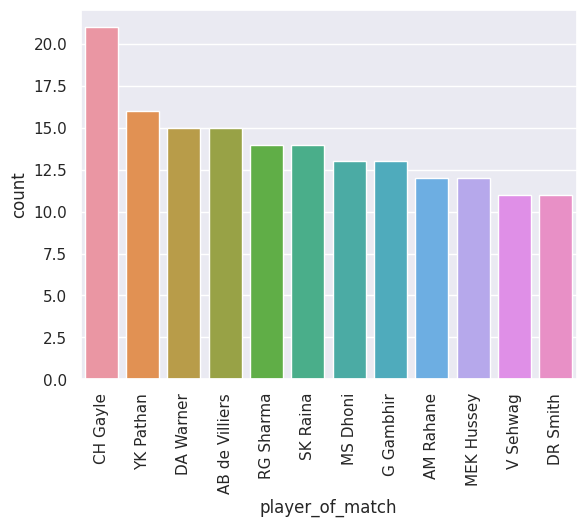

In [16]:
sns.barplot(x=df['player_of_match'].value_counts()[:12].index, y=df['player_of_match'].value_counts()[:12])
plt.xticks(rotation=90)
plt.show()

In [17]:
df['player_of_match'].nunique()

201

In [18]:
df['winner'].value_counts()

winner
Mumbai Indians                 95
Chennai Super Kings            79
Kolkata Knight Riders          77
Royal Challengers Bangalore    73
Kings XI Punjab                70
Rajasthan Royals               63
Delhi Daredevils               62
Sunrisers Hyderabad            42
Deccan Chargers                29
Gujarat Lions                  13
Pune Warriors                  12
Rising Pune Supergiant         10
Kochi Tuskers Kerala            6
Rising Pune Supergiants         5
Name: count, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Mumbai Indians'),
  Text(1, 0, 'Chennai Super Kings'),
  Text(2, 0, 'Kolkata Knight Riders'),
  Text(3, 0, 'Royal Challengers Bangalore'),
  Text(4, 0, 'Kings XI Punjab'),
  Text(5, 0, 'Rajasthan Royals'),
  Text(6, 0, 'Delhi Daredevils'),
  Text(7, 0, 'Sunrisers Hyderabad'),
  Text(8, 0, 'Deccan Chargers'),
  Text(9, 0, 'Gujarat Lions'),
  Text(10, 0, 'Pune Warriors'),
  Text(11, 0, 'Rising Pune Supergiant'),
  Text(12, 0, 'Kochi Tuskers Kerala'),
  Text(13, 0, 'Rising Pune Supergiants')])

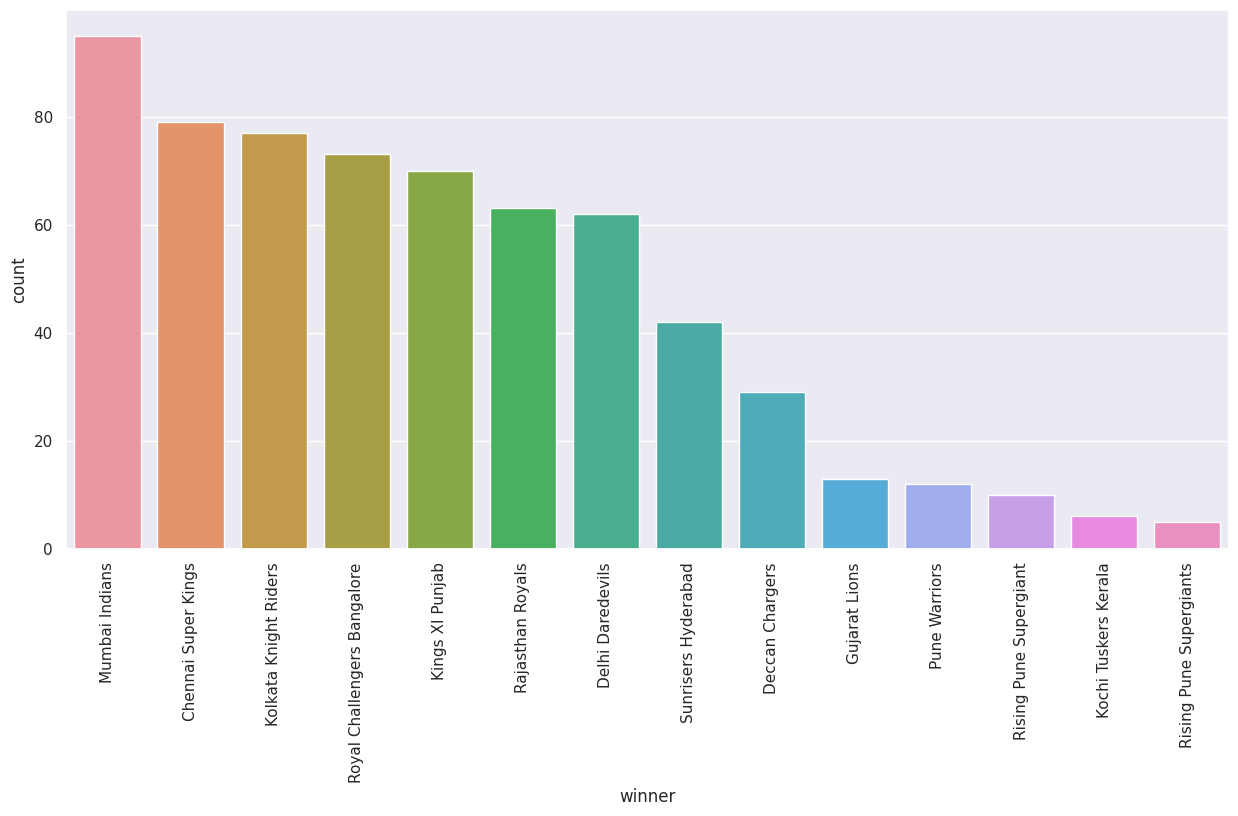

In [19]:
plt.figure(figsize=(15,7)) #no. of teams vs no. of seasons
sns.barplot(x=df['winner'].value_counts().index, y=df['winner'].value_counts())
plt.xticks(rotation=90)

In [20]:
df['venue'].value_counts()

venue
M Chinnaswamy Stadium                                   66
Eden Gardens                                            61
Feroz Shah Kotla                                        60
Wankhede Stadium                                        57
Rajiv Gandhi International Stadium, Uppal               49
MA Chidambaram Stadium, Chepauk                         48
Punjab Cricket Association Stadium, Mohali              35
Sawai Mansingh Stadium                                  33
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
Maharashtra Cricket Association Stadium                 15
Kingsmead                                               15
Sardar Patel Stadium, Motera                            12
SuperSport Park                                         12
Punjab Cricket Association IS Bindra Stadium, Mohali    11
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     11
Brabourne Stadium                                 

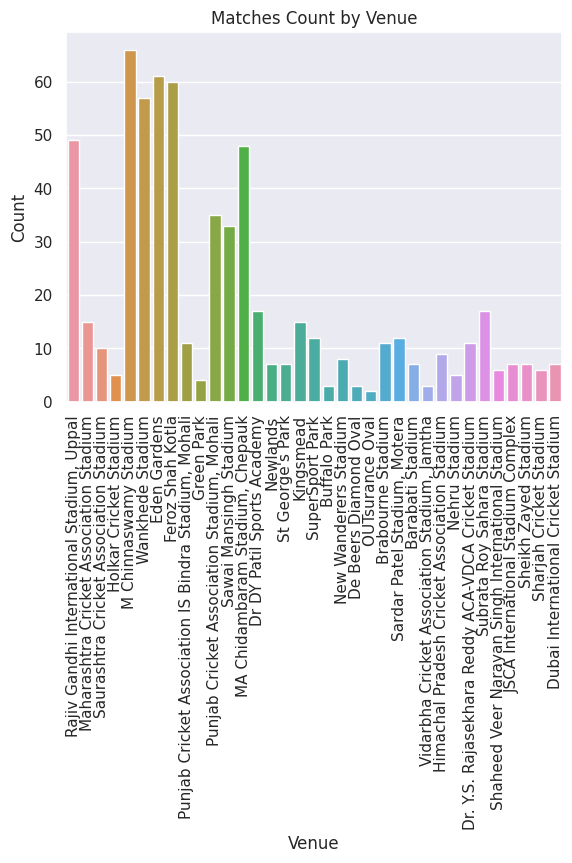

In [21]:
#plt.figure()

sns.countplot(x='venue',data=df)


# Rotate the x-axis labels by 90 degrees for better visibility
plt.xticks(rotation=90)

# Add labels for x and y axes
plt.xlabel('Venue')
plt.ylabel('Count')

# Add a title to the plot
plt.title('Matches Count by Venue')

# Display the plot
plt.show()

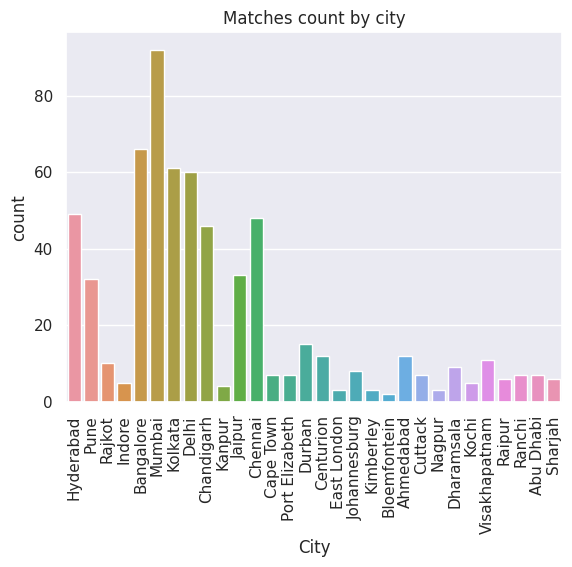

In [22]:
sns.countplot(x='city',data=df)
plt.xticks(rotation=90)
plt.xlabel('City')
plt.ylabel('count')
plt.title('Matches count by city')
plt.show()

Text(0.5, 1.0, 'Top10 players of the match')

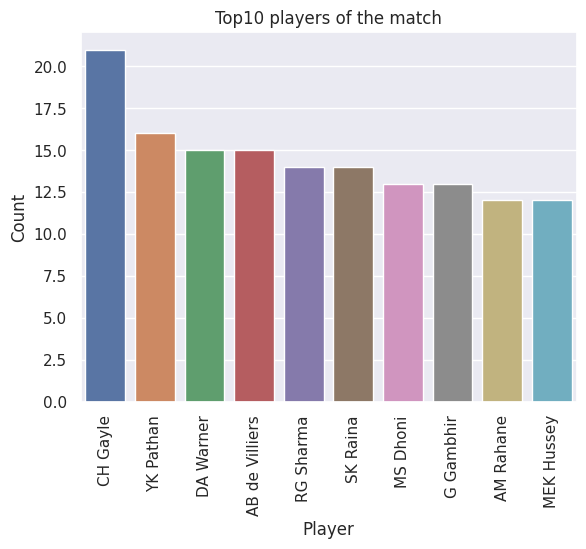

In [23]:
top_players =df['player_of_match'].value_counts().head(10)
sns.barplot(x=top_players.index, y=top_players.values)
plt.xticks(rotation=90)
plt.xlabel('Player')
plt.ylabel('Count')
plt.title('Top10 players of the match')

Text(0.5, 1.0, 'Win Percentage of Each Team')

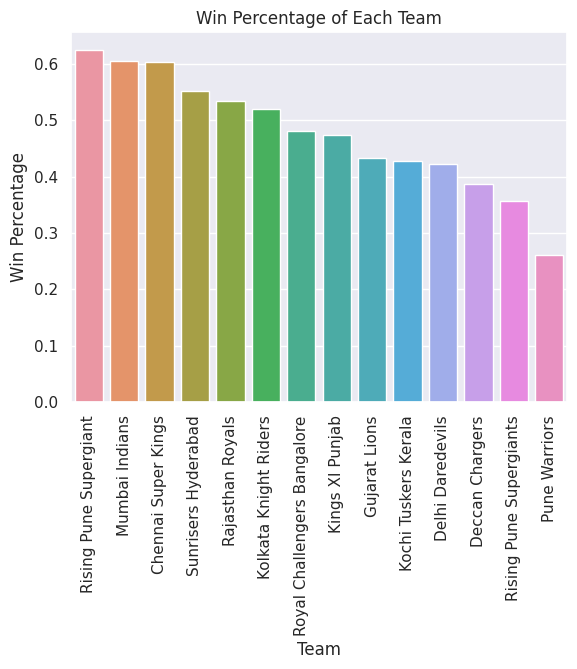

In [24]:
team_wins = df['winner'].value_counts()
team_matches = df['team1'].value_counts() + df['team2'].value_counts()
win_percentage = (team_wins / team_matches).sort_values(ascending=False)
sns.barplot(x=win_percentage.index, y=win_percentage.values)
plt.xticks(rotation=90)
plt.xlabel('Team')
plt.ylabel('Win Percentage')
plt.title('Win Percentage of Each Team')

<Axes: ylabel='count'>

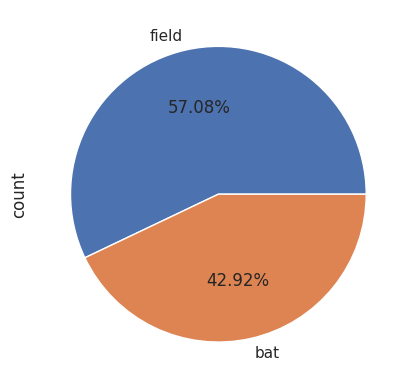

In [25]:
df.value_counts('toss_decision').plot(kind='pie', startangle=0,autopct ='%1.2f%%')

In [26]:
bowl_first_win = df[df['win_by_wickets']>=1]
bowl_first_win

,season,city,team1,team2,toss_winner,toss_decision,dl_applied,win_by_runs,win_by_wickets,player_of_match,venue,winner
1,2017,Pune,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,0,0,7,SPD Smith,Maharashtra Cricket Association Stadium,Rising Pune Supergiant
2,2017,Rajkot,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,0,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Kolkata Knight Riders
3,2017,Indore,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,0,0,6,GJ Maxwell,Holkar Cricket Stadium,Kings XI Punjab
5,2017,Hyderabad,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,0,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad
6,2017,Mumbai,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,0,0,4,N Rana,Wankhede Stadium,Mumbai Indians
...,...,...,...,...,...,...,...,...,...,...,...,...
628,2016,Visakhapatnam,Kings XI Punjab,Rising Pune Supergiants,Kings XI Punjab,bat,0,0,4,MS Dhoni,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,Rising Pune Supergiants
629,2016,Kanpur,Mumbai Indians,Gujarat Lions,Gujarat Lions,field,0,0,6,SK Raina,Green Park,Gujarat Lions
631,2016,Raipur,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,Royal Challengers Bangalore
632,2016,Bangalore,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,0,4,AB de Villiers,M Chinnaswamy Stadium,Royal Challengers Bangalore


In [27]:
bat_first_win = df[df['win_by_runs']>0]
bat_first_win

,season,city,team1,team2,toss_winner,toss_decision,dl_applied,win_by_runs,win_by_wickets,player_of_match,venue,winner
0,2017,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad
4,2017,Bangalore,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,0,15,0,KM Jadhav,M Chinnaswamy Stadium,Royal Challengers Bangalore
8,2017,Pune,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,0,97,0,SV Samson,Maharashtra Cricket Association Stadium,Delhi Daredevils
13,2017,Kolkata,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,0,17,0,RV Uthappa,Eden Gardens,Kolkata Knight Riders
14,2017,Delhi,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,0,51,0,CJ Anderson,Feroz Shah Kotla,Delhi Daredevils
...,...,...,...,...,...,...,...,...,...,...,...,...
624,2016,Visakhapatnam,Delhi Daredevils,Rising Pune Supergiants,Rising Pune Supergiants,field,1,19,0,AB Dinda,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,Rising Pune Supergiants
625,2016,Bangalore,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,1,82,0,V Kohli,M Chinnaswamy Stadium,Royal Challengers Bangalore
630,2016,Kolkata,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,0,22,0,YK Pathan,Eden Gardens,Kolkata Knight Riders
633,2016,Delhi,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,0,22,0,MC Henriques,Feroz Shah Kotla,Sunrisers Hyderabad


<Axes: xlabel='season', ylabel='count'>

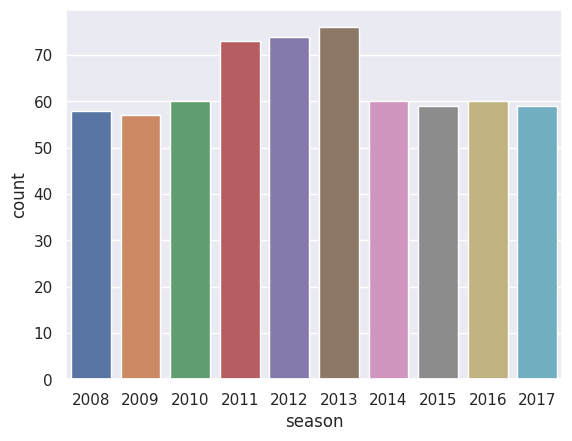

In [28]:
sns.countplot(x='season',data=df)

In [29]:
df.iloc[bat_first_win['win_by_runs'].idxmax()]

season                         2017
city                          Delhi
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
dl_applied                        0
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
winner               Mumbai Indians
Name: 43, dtype: object

In [30]:
bat_first_win['win_by_runs'].max()

146

In [31]:
df.iloc[bat_first_win['win_by_runs'].idxmin()]

season                                                  2017
city                                               Hyderabad
team1                                         Mumbai Indians
team2                                 Rising Pune Supergiant
toss_winner                                   Mumbai Indians
toss_decision                                            bat
dl_applied                                                 0
win_by_runs                                                1
win_by_wickets                                             0
player_of_match                                    KH Pandya
venue              Rajiv Gandhi International Stadium, Uppal
winner                                        Mumbai Indians
Name: 58, dtype: object

In [32]:
bat_first_win['win_by_runs'].min()

1

In [33]:
df.iloc[bowl_first_win['win_by_wickets'].idxmax()]

season                                               2017
city                                               Rajkot
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
dl_applied                                              0
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
winner                              Kolkata Knight Riders
Name: 2, dtype: object

In [34]:
bowl_first_win['win_by_wickets'].max()

10

In [35]:
df.iloc[bowl_first_win['win_by_wickets'].idxmin()]

season                              2015
city                             Kolkata
team1                    Kings XI Punjab
team2              Kolkata Knight Riders
toss_winner              Kings XI Punjab
toss_decision                        bat
dl_applied                             0
win_by_runs                            0
win_by_wickets                         1
player_of_match               AD Russell
venue                       Eden Gardens
winner             Kolkata Knight Riders
Name: 559, dtype: object

In [36]:
bowl_first_win['win_by_wickets'].min()

1

In [37]:
bowl_first_win.sort_values('win_by_wickets')

,season,city,team1,team2,toss_winner,toss_decision,dl_applied,win_by_runs,win_by_wickets,player_of_match,venue,winner
559,2015,Kolkata,Kings XI Punjab,Kolkata Knight Riders,Kings XI Punjab,bat,0,0,1,AD Russell,Eden Gardens,Kolkata Knight Riders
48,2017,Kanpur,Gujarat Lions,Delhi Daredevils,Delhi Daredevils,field,0,0,2,SS Iyer,Green Park,Delhi Daredevils
595,2016,Pune,Rising Pune Supergiants,Kolkata Knight Riders,Kolkata Knight Riders,field,0,0,2,SA Yadav,Maharashtra Cricket Association Stadium,Kolkata Knight Riders
158,2009,Durban,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,0,0,2,LRPL Taylor,Kingsmead,Royal Challengers Bangalore
354,2012,Mumbai,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,0,0,2,DR Smith,Wankhede Stadium,Mumbai Indians
...,...,...,...,...,...,...,...,...,...,...,...,...
390,2013,Chandigarh,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,0,0,10,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings
2,2017,Rajkot,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,0,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Kolkata Knight Riders
542,2015,Delhi,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,0,10,VR Aaron,Feroz Shah Kotla,Royal Challengers Bangalore
119,2009,Cape Town,Kings XI Punjab,Delhi Daredevils,Delhi Daredevils,field,1,0,10,DL Vettori,Newlands,Delhi Daredevils


In [38]:
bat_first_win.sort_values('win_by_runs')

,season,city,team1,team2,toss_winner,toss_decision,dl_applied,win_by_runs,win_by_wickets,player_of_match,venue,winner
163,2009,Johannesburg,Kings XI Punjab,Deccan Chargers,Deccan Chargers,field,0,1,0,Yuvraj Singh,New Wanderers Stadium,Kings XI Punjab
58,2017,Hyderabad,Mumbai Indians,Rising Pune Supergiant,Mumbai Indians,bat,0,1,0,KH Pandya,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians
105,2008,Mumbai,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,0,1,0,SE Marsh,Wankhede Stadium,Kings XI Punjab
614,2016,Chandigarh,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,0,1,0,SR Watson,"Punjab Cricket Association IS Bindra Stadium, ...",Royal Challengers Bangalore
344,2012,Delhi,Delhi Daredevils,Rajasthan Royals,Delhi Daredevils,bat,0,1,0,V Sehwag,Feroz Shah Kotla,Delhi Daredevils
...,...,...,...,...,...,...,...,...,...,...,...,...
410,2013,Bangalore,Royal Challengers Bangalore,Pune Warriors,Pune Warriors,field,0,130,0,CH Gayle,M Chinnaswamy Stadium,Royal Challengers Bangalore
556,2015,Bangalore,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,0,138,0,CH Gayle,M Chinnaswamy Stadium,Royal Challengers Bangalore
59,2008,Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,140,0,BB McCullum,M Chinnaswamy Stadium,Kolkata Knight Riders
619,2016,Bangalore,Royal Challengers Bangalore,Gujarat Lions,Gujarat Lions,field,0,144,0,AB de Villiers,M Chinnaswamy Stadium,Royal Challengers Bangalore


# **Encoding Catagorical Data**

In [39]:
team_mapping = {
    'Kolkata Knight Riders': 1,
    'Chennai Super Kings': 2,
    'Delhi Daredevils': 3,
    'Royal Challengers Bangalore': 4,
    'Rajasthan Royals': 5,
    'Kings XI Punjab': 6,
    'Sunrisers Hyderabad': 7,
    'Mumbai Indians': 8,
    'Rising Pune Supergiant': 9,
    'Rising Pune Supergiants': 9,
    'Kochi Tuskers Kerala': 10,
    'Gujarat Lions': 11,
    'Pune Warriors':12,
    'Deccan Chargers' :13
}

df['team1'] =df['team1'].map(team_mapping)
df['team2'] =df['team2'].map(team_mapping)

df['winner'] =df['winner'].map(team_mapping)
df['toss_winner']=df['toss_winner'].map(team_mapping)

In [40]:
# Create a dictionary to map each unique venue name to a unique number
venue_mapping ={ venue: i for i,venue in enumerate(df['venue'].unique())}
# Replace the venue names in the 'venue' column with the corresponding unique numbers
df['venue'] = df['venue'].map(venue_mapping)

In [41]:
temp ={'field':0,'bat':1}
df['toss_decision'] =df['toss_decision'].map(temp)

In [42]:
# Create a dictionary to map each unique venue name to a unique number
player_of_match_mapping = {venue: i for i, venue in enumerate(df['player_of_match'].unique())}

# Replace the venue names in the 'venue' column with the corresponding unique numbers
df['player_of_match'] = df['player_of_match'].map(player_of_match_mapping)

In [43]:
# Create a dictionary to map each unique venue name to a unique number
city_mapping = {venue: i for i, venue in enumerate(df['city'].unique())}

# Replace the venue names in the 'venue' column with the corresponding unique numbers
df['city'] = df['city'].map(city_mapping)

In [44]:
df.head()

,season,city,team1,team2,toss_winner,toss_decision,dl_applied,win_by_runs,win_by_wickets,player_of_match,venue,winner
0,2017,0,7,4,4,0,0,35,0,0,0,7
1,2017,1,8,9,9,0,0,0,7,1,1,9
2,2017,2,11,1,1,0,0,0,10,2,2,1
3,2017,3,9,6,6,0,0,0,6,3,3,6
4,2017,4,4,3,4,1,0,15,0,4,4,4


<Axes: >

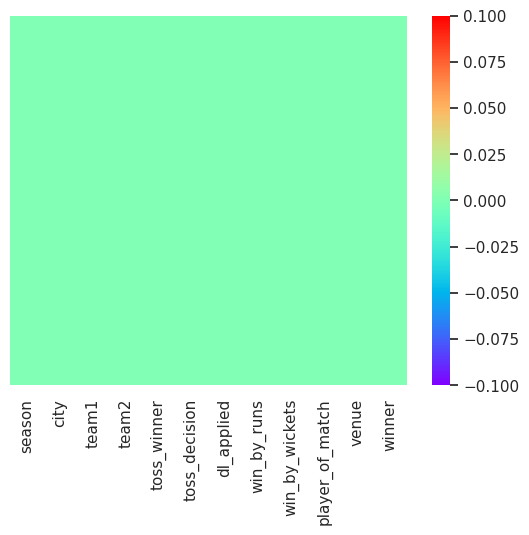

In [45]:
sns.heatmap(df.isnull(), cmap='rainbow',yticklabels= False)
#this shows there is still some missing value

**Splitting data**

In [46]:
from sklearn.model_selection import train_test_split 

In [47]:
X = df.drop(['winner'], axis=1)
y = df['winner']

In [48]:
y

0      7
1      9
2      1
3      6
4      4
      ..
631    4
632    4
633    7
634    7
635    7
Name: winner, Length: 636, dtype: int64

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (508, 11)
y_train shape: (508,)
X_test shape: (128, 11)
y_test shape: (128,)


**Identifiying imp feature**

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [52]:
forest = RandomForestClassifier(n_estimators=500, random_state=2)

# Train the RandomForestClassifier on the training data
forest.fit(X_train, y_train.values.ravel())


RandomForestClassifier(n_estimators=500, random_state=2)

In [53]:
importances = forest.feature_importances_

for i in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (i+1, 30, df.columns[i], importances[i]))

 1) season                         0.071839
 2) city                           0.089245
 3) team1                          0.138359
 4) team2                          0.177734
 5) toss_winner                    0.116055
 6) toss_decision                  0.023797
 7) dl_applied                     0.005584
 8) win_by_runs                    0.096281
 9) win_by_wickets                 0.087606
10) player_of_match                0.106367
11) venue                          0.087134


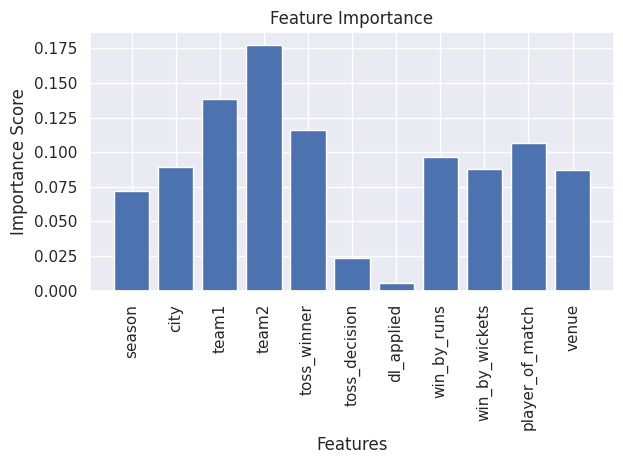

In [54]:
plt.bar(range(X_train.shape[1]),importances, align='center')
plt.title('Feature Importance')
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()

# **Training Models**

**SVM**

In [55]:
clf2 =SVC()
clf2.fit(X_train, y_train)

SVC()

In [56]:
y_pred2= clf2.predict(X_test)
accuracy= accuracy_score(y_test,y_pred2)
print('accuracy:',accuracy)
#much more worse than LR

accuracy: 0.125


**Random Forest Classifier**

In [57]:
clf3= RandomForestClassifier()
clf3.fit(X_train,y_train)


RandomForestClassifier()

In [58]:
y_pred3= clf3.predict(X_test)
acc = accuracy_score(y_test,y_pred3)
print(acc)
#great

0.7890625
